In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf

print(tf.__version__)

!pip uninstall tensorflow==2.2.0

!pip install tensorflow==1.15.0

!pip install bert-tensorflow

2.2.0
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 512kB 54.3MB/s 
     |████████████████████████████████| 3.8MB 55.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=37780fda8320c0010b45766fe1f21e9e4b2e5512ba2155d7f80e3d37937c8e67
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you

     |████████████████████████████████| 71kB 2.6MB/s 


In [0]:

import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from sklearn.model_selection import train_test_split
import os

print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  1.15.0
tensorflow_hub version :  0.8.0


In [0]:
!pip install bert-tensorflow

In [0]:
#Importing BERT modules
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [0]:
# Set the output directory for saving model file
OUTPUT_DIR = '/content/drive/My Drive/Colab Notebooks/BERT/bert_news_category'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category *****


In [0]:

train = pd.read_json("/content/drive/My Drive/train.jsonl",lines=True)
test = pd.read_json("/content/drive/My Drive/test.jsonl",lines=True)
val= pd.read_json("/content/drive/My Drive/dev.jsonl",lines=True)


In [0]:
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [0]:

val.head()

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime


In [0]:
test.head()

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats


In [0]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test.shape)


Training Set Shape : (8500, 4)
Validation Set Shape : (500, 4)
Test Set Shape : (1000, 3)


In [0]:

#Features in the dataset
train.columns

Index(['id', 'img', 'label', 'text'], dtype='object')

In [0]:
#unique classes
train['label'].unique()

array([0, 1])

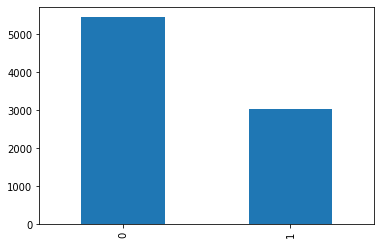

In [0]:
train['label'].value_counts().plot(kind = 'bar')

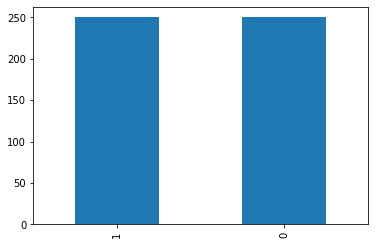

In [0]:
val['label'].value_counts().plot(kind = 'bar')

In [0]:

DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'
# The list containing all the classes (train['SECTION'].unique())
label_list = [0, 1]

In [0]:
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [0]:
train_InputExamples.head()

0    <bert.run_classifier.InputExample object at 0x...
1    <bert.run_classifier.InputExample object at 0x...
2    <bert.run_classifier.InputExample object at 0x...
3    <bert.run_classifier.InputExample object at 0x...
4    <bert.run_classifier.InputExample object at 0x...
dtype: object

In [0]:
print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  its their character not their color that matters

__________
Row 0 - text_b of training set :  None

__________
Row 0 - label of training set :  0


In [0]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:

#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['its', 'their', 'character', 'not', 'their', 'color', 'that', 'matters']


In [0]:
# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 30

# Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 8500


INFO:tensorflow:Writing example 0 of 8500


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] its their character not their color that matters [SEP]


INFO:tensorflow:tokens: [CLS] its their character not their color that matters [SEP]


INFO:tensorflow:input_ids: 101 2049 2037 2839 2025 2037 3609 2008 5609 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2049 2037 2839 2025 2037 3609 2008 5609 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] don ' t be afraid to love again everyone is not like your ex [SEP]


INFO:tensorflow:tokens: [CLS] don ' t be afraid to love again everyone is not like your ex [SEP]


INFO:tensorflow:input_ids: 101 2123 1005 1056 2022 4452 2000 2293 2153 3071 2003 2025 2066 2115 4654 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2123 1005 1056 2022 4452 2000 2293 2153 3071 2003 2025 2066 2115 4654 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] putting bows on your pet [SEP]


INFO:tensorflow:tokens: [CLS] putting bows on your pet [SEP]


INFO:tensorflow:input_ids: 101 5128 21207 2006 2115 9004 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5128 21207 2006 2115 9004 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] i love everything and everybody ! except for squirrels i hate squirrels [SEP]


INFO:tensorflow:tokens: [CLS] i love everything and everybody ! except for squirrels i hate squirrels [SEP]


INFO:tensorflow:input_ids: 101 1045 2293 2673 1998 7955 999 3272 2005 29384 1045 5223 29384 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1045 2293 2673 1998 7955 999 3272 2005 29384 1045 5223 29384 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] everybody loves chocolate chip cookies , even hitler [SEP]


INFO:tensorflow:tokens: [CLS] everybody loves chocolate chip cookies , even hitler [SEP]


INFO:tensorflow:input_ids: 101 7955 7459 7967 9090 16324 1010 2130 8042 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 7955 7459 7967 9090 16324 1010 2130 8042 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Writing example 0 of 500


INFO:tensorflow:Writing example 0 of 500


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] white people is this a shooting range [SEP]


INFO:tensorflow:tokens: [CLS] white people is this a shooting range [SEP]


INFO:tensorflow:input_ids: 101 2317 2111 2003 2023 1037 5008 2846 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2317 2111 2003 2023 1037 5008 2846 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bravery at its finest [SEP]


INFO:tensorflow:tokens: [CLS] bravery at its finest [SEP]


INFO:tensorflow:input_ids: 101 16534 2012 2049 10418 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 16534 2012 2049 10418 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] your order comes to $ 37 . 50 and your white privilege discount brings the total to $ 37 . 50 [SEP]


INFO:tensorflow:tokens: [CLS] your order comes to $ 37 . 50 and your white privilege discount brings the total to $ 37 . 50 [SEP]


INFO:tensorflow:input_ids: 101 2115 2344 3310 2000 1002 4261 1012 2753 1998 2115 2317 14293 19575 7545 1996 2561 2000 1002 4261 1012 2753 102 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2115 2344 3310 2000 1002 4261 1012 2753 1998 2115 2317 14293 19575 7545 1996 2561 2000 1002 4261 1012 2753 102 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] it is time . . to send these parasites back to the desert [SEP]


INFO:tensorflow:tokens: [CLS] it is time . . to send these parasites back to the desert [SEP]


INFO:tensorflow:input_ids: 101 2009 2003 2051 1012 1012 2000 4604 2122 23996 2067 2000 1996 5532 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2009 2003 2051 1012 1012 2000 4604 2122 23996 2067 2000 1996 5532 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mississippi wind chi ##me [SEP]


INFO:tensorflow:tokens: [CLS] mississippi wind chi ##me [SEP]


INFO:tensorflow:input_ids: 101 5900 3612 9610 4168 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5900 3612 9610 4168 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


In [0]:
#Example on first observation in the training set
print("Sentence : ", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)

Sentence :  its their character not their color that matters
------------------------------
Tokens :  ['its', 'their', 'character', 'not', 'their', 'color', 'that', 'matters']
------------------------------
Input IDs :  [101, 2049, 2037, 2839, 2025, 2037, 3609, 2008, 5609, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
------------------------------
Input Masks :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
------------------------------
Segment IDs :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [0]:
#A function that adapts our model to work for training, evaluation, and prediction.

# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        auc= tf.metrics.auc(label_ids,predicted_labels)
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "auc roc": auc,
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [0]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [0]:

model_fn(test,[0,1],is_predicting,)

NameError: ignored

In [0]:

#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/Colab Notebooks/BERT/bert_news_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f48f7d53710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/Colab Notebooks/BERT/bert_news_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f48f7d53710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:

# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [0]:
#Training the model
print('Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-796


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-796


Instructions for updating:
Use standard file utilities to get mtimes.


Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 796 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 796 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:loss = 0.5260006, step = 796


INFO:tensorflow:loss = 0.5260006, step = 796


INFO:tensorflow:global_step/sec: 2.76999


INFO:tensorflow:global_step/sec: 2.76999


INFO:tensorflow:loss = 0.4088241, step = 896 (36.107 sec)


INFO:tensorflow:loss = 0.4088241, step = 896 (36.107 sec)


INFO:tensorflow:global_step/sec: 6.45958


INFO:tensorflow:global_step/sec: 6.45958


INFO:tensorflow:loss = 0.36114496, step = 996 (15.477 sec)


INFO:tensorflow:loss = 0.36114496, step = 996 (15.477 sec)


INFO:tensorflow:Saving checkpoints for 1096 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1096 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 4.27864


INFO:tensorflow:global_step/sec: 4.27864


INFO:tensorflow:loss = 0.57066137, step = 1096 (23.373 sec)


INFO:tensorflow:loss = 0.57066137, step = 1096 (23.373 sec)


INFO:tensorflow:global_step/sec: 6.43509


INFO:tensorflow:global_step/sec: 6.43509


INFO:tensorflow:loss = 0.15367562, step = 1196 (15.539 sec)


INFO:tensorflow:loss = 0.15367562, step = 1196 (15.539 sec)


INFO:tensorflow:global_step/sec: 6.42892


INFO:tensorflow:global_step/sec: 6.42892


INFO:tensorflow:loss = 0.38153666, step = 1296 (15.556 sec)


INFO:tensorflow:loss = 0.38153666, step = 1296 (15.556 sec)


INFO:tensorflow:Saving checkpoints for 1396 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1396 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:global_step/sec: 4.4816


INFO:tensorflow:global_step/sec: 4.4816


INFO:tensorflow:loss = 0.30504683, step = 1396 (22.312 sec)


INFO:tensorflow:loss = 0.30504683, step = 1396 (22.312 sec)


INFO:tensorflow:global_step/sec: 6.42817


INFO:tensorflow:global_step/sec: 6.42817


INFO:tensorflow:loss = 0.22097161, step = 1496 (15.557 sec)


INFO:tensorflow:loss = 0.22097161, step = 1496 (15.557 sec)


INFO:tensorflow:global_step/sec: 6.46089


INFO:tensorflow:global_step/sec: 6.46089


INFO:tensorflow:loss = 0.38251334, step = 1596 (15.479 sec)


INFO:tensorflow:loss = 0.38251334, step = 1596 (15.479 sec)


INFO:tensorflow:Saving checkpoints for 1696 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1696 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 4.28865


INFO:tensorflow:global_step/sec: 4.28865


INFO:tensorflow:loss = 0.13800606, step = 1696 (23.316 sec)


INFO:tensorflow:loss = 0.13800606, step = 1696 (23.316 sec)


INFO:tensorflow:global_step/sec: 6.43423


INFO:tensorflow:global_step/sec: 6.43423


INFO:tensorflow:loss = 0.3146519, step = 1796 (15.543 sec)


INFO:tensorflow:loss = 0.3146519, step = 1796 (15.543 sec)


INFO:tensorflow:global_step/sec: 6.45289


INFO:tensorflow:global_step/sec: 6.45289


INFO:tensorflow:loss = 0.35017288, step = 1896 (15.497 sec)


INFO:tensorflow:loss = 0.35017288, step = 1896 (15.497 sec)


INFO:tensorflow:Saving checkpoints for 1996 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1996 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 4.62598


INFO:tensorflow:global_step/sec: 4.62598


INFO:tensorflow:loss = 0.1498365, step = 1996 (21.617 sec)


INFO:tensorflow:loss = 0.1498365, step = 1996 (21.617 sec)


INFO:tensorflow:global_step/sec: 6.43872


INFO:tensorflow:global_step/sec: 6.43872


INFO:tensorflow:loss = 0.4092582, step = 2096 (15.530 sec)


INFO:tensorflow:loss = 0.4092582, step = 2096 (15.530 sec)


INFO:tensorflow:global_step/sec: 6.44934


INFO:tensorflow:global_step/sec: 6.44934


INFO:tensorflow:loss = 0.19447687, step = 2196 (15.506 sec)


INFO:tensorflow:loss = 0.19447687, step = 2196 (15.506 sec)


INFO:tensorflow:Saving checkpoints for 2296 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2296 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 4.30843


INFO:tensorflow:global_step/sec: 4.30843


INFO:tensorflow:loss = 0.15102251, step = 2296 (23.211 sec)


INFO:tensorflow:loss = 0.15102251, step = 2296 (23.211 sec)


INFO:tensorflow:global_step/sec: 6.48112


INFO:tensorflow:global_step/sec: 6.48112


INFO:tensorflow:loss = 0.1655127, step = 2396 (15.430 sec)


INFO:tensorflow:loss = 0.1655127, step = 2396 (15.430 sec)


INFO:tensorflow:global_step/sec: 6.46945


INFO:tensorflow:global_step/sec: 6.46945


INFO:tensorflow:loss = 0.3034009, step = 2496 (15.455 sec)


INFO:tensorflow:loss = 0.3034009, step = 2496 (15.455 sec)


INFO:tensorflow:Saving checkpoints for 2596 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2596 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 4.59302


INFO:tensorflow:global_step/sec: 4.59302


INFO:tensorflow:loss = 0.1992915, step = 2596 (21.772 sec)


INFO:tensorflow:loss = 0.1992915, step = 2596 (21.772 sec)


INFO:tensorflow:Saving checkpoints for 2656 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2656 into /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt.


INFO:tensorflow:Loss for final step: 0.09750655.


INFO:tensorflow:Loss for final step: 0.09750655.


Training took time  0:07:39.435592


In [0]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-05-19T10:47:49Z


INFO:tensorflow:Starting evaluation at 2020-05-19T10:47:49Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-2656


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-2656


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-05-19-10:48:24


INFO:tensorflow:Finished evaluation at 2020-05-19-10:48:24


INFO:tensorflow:Saving dict for global step 2656: auc roc = 0.556, eval_accuracy = 0.556, false_negatives = 175.0, false_positives = 47.0, global_step = 2656, loss = 1.938443, true_negatives = 203.0, true_positives = 75.0


INFO:tensorflow:Saving dict for global step 2656: auc roc = 0.556, eval_accuracy = 0.556, false_negatives = 175.0, false_positives = 47.0, global_step = 2656, loss = 1.938443, true_negatives = 203.0, true_positives = 75.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2656: /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-2656


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2656: /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-2656


{'auc roc': 0.556,
 'eval_accuracy': 0.556,
 'false_negatives': 175.0,
 'false_positives': 47.0,
 'global_step': 2656,
 'loss': 1.938443,
 'true_negatives': 203.0,
 'true_positives': 75.0}

In [0]:
def getPrediction(in_sentences):
  #A list to map the actual labels to the predictions
  labels = ["Not Hateful","Hateful"]

  #Transforming the test data into BERT accepted form
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  
  #Creating input features for Test data
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)

  #Predicting the classes 
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [(sentence, prediction['probabilities'],prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [0]:
pred_sentences = list(test['text'])
predictions = getPrediction(pred_sentences)

INFO:tensorflow:Writing example 0 of 1000


INFO:tensorflow:Writing example 0 of 1000


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] hand ##jo ##bs sold sep ##erate ##ly [SEP]


INFO:tensorflow:tokens: [CLS] hand ##jo ##bs sold sep ##erate ##ly [SEP]


INFO:tensorflow:input_ids: 101 2192 5558 5910 2853 19802 22139 2135 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2192 5558 5910 2853 19802 22139 2135 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] introducing fi ##dget spin ##ner for women [SEP]


INFO:tensorflow:tokens: [CLS] introducing fi ##dget spin ##ner for women [SEP]


INFO:tensorflow:input_ids: 101 10449 10882 24291 6714 3678 2005 2308 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10449 10882 24291 6714 3678 2005 2308 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] happy pride month let ' s go beat up lesbian ##s [SEP]


INFO:tensorflow:tokens: [CLS] happy pride month let ' s go beat up lesbian ##s [SEP]


INFO:tensorflow:input_ids: 101 3407 6620 3204 2292 1005 1055 2175 3786 2039 11690 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3407 6620 3204 2292 1005 1055 2175 3786 2039 11690 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] laughs in [ majority of u . s crime rate ] [SEP]


INFO:tensorflow:tokens: [CLS] laughs in [ majority of u . s crime rate ] [SEP]


INFO:tensorflow:input_ids: 101 11680 1999 1031 3484 1997 1057 1012 1055 4126 3446 1033 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 11680 1999 1031 3484 1997 1057 1012 1055 4126 3446 1033 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] finds out those 72 virgin ##s . . are goats [SEP]


INFO:tensorflow:tokens: [CLS] finds out those 72 virgin ##s . . are goats [SEP]


INFO:tensorflow:input_ids: 101 4858 2041 2216 5824 6261 2015 1012 1012 2024 17977 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4858 2041 2216 5824 6261 2015 1012 1012 2024 17977 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-2656


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/BERT/bert_news_category/model.ckpt-2656


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
predictions[0][1][1]

-0.7500273

In [0]:
proba=[]
labels=[]
for i in range(len(predictions)):
  proba.append(predictions[i][1][1])
  labels.append(predictions[i][2])
print(proba[0])
print(labels[0])

-0.7500273
0


In [0]:
output = pd.DataFrame({'id': test.id , 'proba': proba, 'label': labels})
output.to_csv('bert3.csv', index=False)
output.head()

,id,proba,label
0,16395,-0.750027,0
1,37405,-0.463043,1
2,94180,-2.988102,0
3,54321,-6.826947,0
4,97015,-0.836276,0


In [0]:
test.id

0      16395
1      37405
2      94180
3      54321
4      97015
       ...  
995     3869
996    23817
997    56280
998    29384
999    34127
Name: id, Length: 1000, dtype: int64